In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout



In [26]:
# Load the dataset
data = pd.read_csv(r"GOOGL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [27]:
# Drop any missing values
data = data.dropna()

In [28]:
# Select only the 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

In [29]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [30]:
# Define the sequence length (number of time steps)
sequence_length = 60

# Function to create sequences of data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Create sequences of data
X, y = create_sequences(prices_scaled, sequence_length)



In [31]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [32]:
# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
110/110 [==============================] - 16s 71ms/step - loss: 0.0018
Epoch 2/10
110/110 [==============================] - 8s 68ms/step - loss: 3.2749e-04
Epoch 3/10
110/110 [==============================] - 7s 63ms/step - loss: 2.6667e-04
Epoch 4/10
110/110 [==============================] - 7s 65ms/step - loss: 2.4703e-04
Epoch 5/10
110/110 [==============================] - 7s 62ms/step - loss: 2.3359e-04
Epoch 6/10
110/110 [==============================] - 7s 64ms/step - loss: 2.1845e-04
Epoch 7/10
110/110 [==============================] - 7s 67ms/step - loss: 2.1286e-04
Epoch 8/10
110/110 [==============================] - 7s 64ms/step - loss: 1.9140e-04
Epoch 9/10
110/110 [==============================] - 7s 63ms/step - loss: 1.7694e-04
Epoch 10/10
110/110 [==============================] - 7s 63ms/step - loss: 1.7444e-04


In [35]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

28/28 [==============================] - 3s 70ms/step - loss: 0.0011
Test Loss: 0.0010800869204103947


In [36]:
# Make predictions
predictions = model.predict(X_test)

28/28 [==============================] - 2s 23ms/step


In [37]:
# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

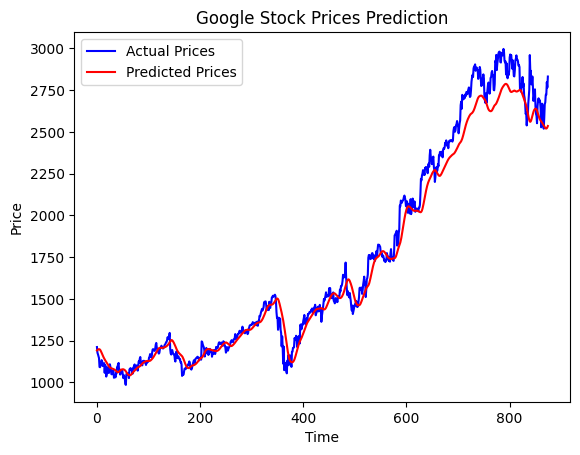

In [38]:
# Plot the predictions and actual values
plt.plot(actual, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Google Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/50
112/112 [==============================] - 19s 115ms/step - loss: 0.0158
Epoch 2/50
112/112 [==============================] - 13s 112ms/step - loss: 0.0024
Epoch 3/50
112/112 [==============================] - 13s 115ms/step - loss: 0.0020
Epoch 4/50
112/112 [==============================] - 13s 112ms/step - loss: 0.0020
Epoch 5/50
112/112 [==============================] - 13s 116ms/step - loss: 0.0016
Epoch 6/50
112/112 [==============================] - 12s 111ms/step - loss: 0.0016
Epoch 7/50
112/112 [==============================] - 12s 108ms/step - loss: 0.0015
Epoch 8/50
112/112 [==============================] - 12s 110ms/step - loss: 0.0014
Epoch 9/50
112/112 [==============================] - 13s 112ms/step - loss: 0.0015
Epoch 10/50
112/112 [==============================] - 12s 108ms/step - loss: 0.0011
Epoch 11/50
112/112 [==============================] - 14s 123ms/step - loss: 0.0014
Epoch 12/50
112/112 [==============================] - 13s 113ms/step - lo

In [19]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


NameError: name 'model' is not defined

NameError: name 'past_60_days' is not defined